# Practice Case<br>Exploratory Data Analysis

### By : Kurnia Aditia
#### Data Fellowship Program <br>Batch 6

##### Import library & data

In [1]:
import pandas as pd
url='https://raw.githubusercontent.com/Syukrondzeko/Fellowship/main/epl_1819.csv'
df=pd.read_csv(url,index_col=0)
df.reset_index(inplace=True)
df.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3


#### Objective 1 :
##### Pre-Processing
Is the data clean ?

In [3]:
##Check missing Value
missing_value=df.isnull().sum()
missing_value[missing_value>0]

Series([], dtype: int64)

In [4]:
##Check duplicate data
df.duplicated('Team')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [5]:
##Check Data Type
df.info() 
#there is incompatible data type in variable attack_passes,attack_passes_long, attack_passes_back, and defence_clearances

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

In [6]:
#Fix the incompatible data type 
df_num=df.iloc[:,2:]
df_num.replace(',','', regex=True, inplace=True)
n=df_num.select_dtypes(object).columns
df_num[n] = df_num[n].apply(pd.to_numeric,errors='coerce')

In [7]:
df_new=df.iloc[:,:2].join(df_num)
df_new.info() #re-check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

#### Answer :
The data is not clean because some variable have incompatible data type, and its already fixed

#### Objective 2 :
How is the point distribution of the epl team? and which team is an anomaly?

In [8]:
#Import library
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9076767f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b907676eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b907676490>],
 'medians': [<matplotlib.lines.Line2D at 0x1b90768f5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b90768f910>],
 'means': []}

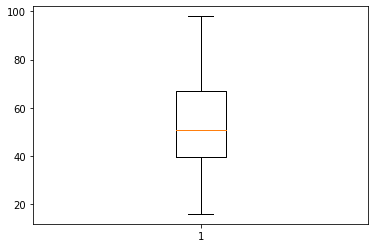

In [9]:
df_poin=df[['Team','general_points']] # select Team and general poin to make plotting easier
plt.boxplot(df_poin['general_points']) # create boxplot to check outlier

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='general_points', ylabel='Density'>

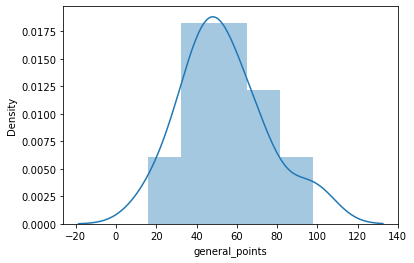

In [10]:
sns.distplot(df_poin['general_points']) #create distribution plot to see the general_points's density distribution 

<AxesSubplot:xlabel='general_points', ylabel='Team'>

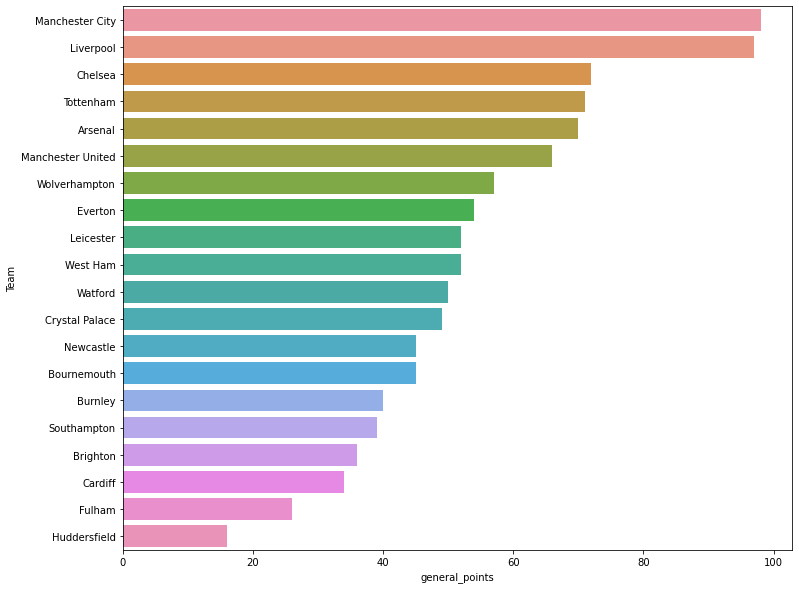

In [19]:
fig,ax=plt.subplots(figsize=(12,10))
sns.barplot(x='general_points',y='Team',data=df_poin) # create barplot too see raw data distribution 

#### Objective 3 :
Which team has the best attack? 

In [12]:
from sklearn.preprocessing import MinMaxScaler #import library
scaler = MinMaxScaler()

In [15]:
#slice data frame that contain team variable and 'attack' aspects variables
attack=df_new[['Team','category']].join(df_new[df_new.filter(regex='^attack',axis=1).columns.tolist()])
attack.head()

,Team,category,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,95,26581,112,1814,4240,783,298,683,260,12,3,80,15,5,2,64.0,89.0
1,Liverpool,Champions League,89,23638,98,2250,3416,721,249,575,226,19,7,84,5,6,1,58.8,84.4
2,Chelsea,Champions League Qualification,63,25070,146,1774,3874,692,215,607,198,8,5,54,9,1,1,59.9,87.6
3,Tottenham,Champions League Qualification,67,21295,87,2267,3191,643,194,537,189,14,4,53,14,5,2,56.7,83.2
4,Arsenal,Europa League,73,20805,65,2062,3102,605,209,467,170,5,4,62,11,3,3,56.1,83.3


In [20]:
#Re-scale numeric variable
attack[attack.filter(regex='^attack',axis=1).columns.tolist()]= scaler.fit_transform(attack[attack.filter(regex='^attack',axis=1).columns.tolist()])
#create new column that contain average from the whole 'attack' aspect variable
attack['avg_attack']=attack[attack.filter(regex='^attack',axis=1).columns.tolist()].mean(axis=1)
# Select top 5 team by the highest average attack
attack[['Team','avg_attack']].sort_values('avg_attack',ascending=False).reset_index(drop=True).head(5)

,Team,avg_attack
0,Manchester City,0.798300
1,Liverpool,0.695647
2,Tottenham,0.577511
3,Chelsea,0.573277
4,Leicester,0.542104


#### Objective 4 :
Which team has the best defence? 

In [16]:
#slice data frame that contain team variable and 'defence' aspects variables
defence=df_new[['Team','category']].join(df_new[df_new.filter(regex='^defence',axis=1).columns.tolist()])
defence.head()

,Team,category,defence_goals_conceeded,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded
0,Manchester City,Champions League,23,58,63,362,518,0,543,295,4
1,Liverpool,Champions League,22,76,78,314,610,2,639,317,1
2,Chelsea,Champions League Qualification,39,85,73,351,618,2,593,330,2
3,Tottenham,Champions League Qualification,39,121,112,326,626,3,770,411,5
4,Arsenal,Europa League,51,133,118,412,609,2,762,404,7


In [21]:
#Re-scale numeric variable
defence[defence.filter(regex='^defence',axis=1).columns.tolist()]= scaler.fit_transform(defence[defence.filter(regex='^defence',axis=1).columns.tolist()])
#create new column that contain average from the whole 'defence' aspect variable
defence['avg_defence']=defence[defence.filter(regex='^defence',axis=1).columns.tolist()].mean(axis=1)
# Select top 5 team by the lowest average defence
defence[['Team','avg_defence']].sort_values('avg_defence').reset_index(drop=True).head(5)

,Team,avg_defence
0,Manchester City,0.078833
1,Liverpool,0.151994
2,Chelsea,0.221418
3,Tottenham,0.398750
4,Manchester United,0.416620


#### Objective 5:
Which team is good in the financial aspect? 

In [17]:
#slice data frame that contain team variable and 'finance' aspects variables
finance=df_new[['Team','category']].join(df_new[df_new.filter(regex='^finance',axis=1).columns.tolist()])
finance.head()

,Team,category,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
0,Manchester City,Champions League,26,150986355,1003200000,39987200
1,Liverpool,Champions League,29,152425146,836440000,34848000
2,Chelsea,Champions League Qualification,25,146030216,779460000,29981600
3,Tottenham,Champions League Qualification,26,145230801,735240000,29409600
4,Arsenal,Europa League,25,142193180,701800000,26989600


In [18]:
#Re-scale numeric variable
finance[finance.filter(regex='^finance',axis=1).columns.tolist()]= scaler.fit_transform(finance[finance.filter(regex='^finance',axis=1).columns.tolist()])
#create new column that contain average from the whole 'finance' aspect variable
finance['avg_finance']=finance[finance.filter(regex='^finance',axis=1).columns.tolist()].mean(axis=1)
# Select top 5 team by the highest average finance
finance[['Team','avg_finance']].sort_values('avg_finance',ascending=False).reset_index(drop=True).head()

,Team,avg_finance
0,Manchester City,0.954080
1,Liverpool,0.919785
2,Chelsea,0.790038
3,Tottenham,0.783696
4,Arsenal,0.731437


#### Additional Insight

([<matplotlib.patches.Wedge at 0x1b908c1faf0>,
 [Text(1.0461621663333946, 0.3399186987098808, 'Champions League'),
  Text(0.6465637650236903, 0.8899187028927925, 'Champions League Qualification'),
  Text(-2.5747358111484753e-08, 1.0999999999999999, 'Europa League'),
  Text(-0.4993895795368845, 0.9801071614114315, 'Europa League Qualification'),
  Text(-0.8899186726249574, -0.6465638066837905, 'No UEFA Competitions'),
  Text(0.9801072023231264, -0.49938949924316034, 'Relegated')],
 [Text(0.4755282574242703, 0.15450849941358216, '10.0%'),
  Text(0.2938926204653137, 0.4045085013149057, '10.0%'),
  Text(-1.1703344596129433e-08, 0.4999999999999999, '10.0%'),
  Text(-0.22699526342585657, 0.4455032551870143, '5.0%'),
  Text(-0.4045084875567988, -0.29389263940172294, '50.0%'),
  Text(0.44550327378323923, -0.22699522692870922, '15.0%')])

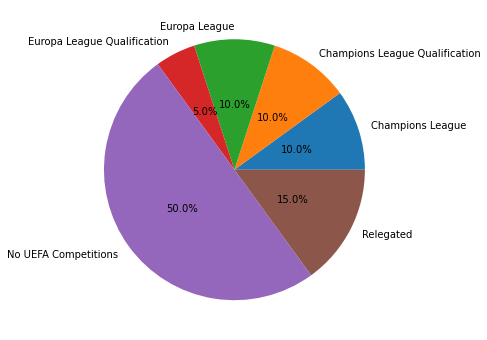

In [22]:
#Pie chart team category
cat=df_new[['Team','category']].groupby('category').count()
pie, ax = plt.subplots(figsize=[10,6])
labels = cat.index.tolist()
plt.pie(x=cat['Team'], autopct="%.1f%%", labels=labels, pctdistance=0.5)

<AxesSubplot:xlabel='defence_goals_conceeded', ylabel='general_lost'>

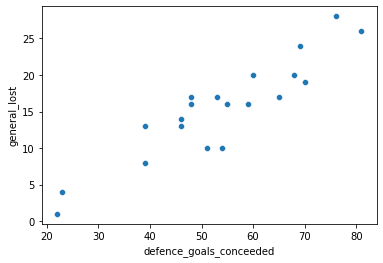

In [23]:
#Scatter plot 
sns.scatterplot(x='defence_goals_conceeded',y='general_lost',data=df_new)

<AxesSubplot:xlabel='general_draw', ylabel='Team'>

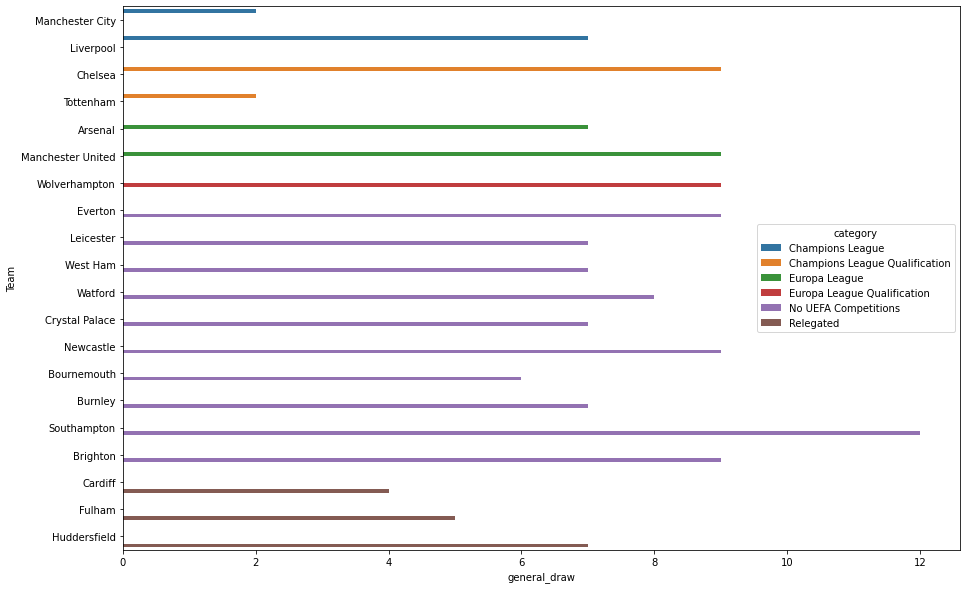

In [44]:
#bar plot general draw by category
pie, ax = plt.subplots(figsize=[15,10])
sns.barplot(x='general_draw',y='Team',hue='category',data=df_new)